In [67]:
%load_ext google.cloud.bigquery


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [68]:
# imports for numerical computation 
import pandas as pd
import numpy as np
from google.cloud import bigquery
from sklearn import model_selection, feature_selection, metrics
from sklearn import tree, ensemble, linear_model


# imports for Visualisation 
import seaborn as sns
# from plotly import __version__
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from matplotlib import pyplot as plt
# print(__version__) # requires version >= 1.9.0
# import cufflinks as cf
# For Notebooks
# init_notebook_mode(connected=True)
# For offline use
# cf.go_offline()
import missingno as msno
import matplotlib.ticker as ticker




# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 11 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2010.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

## Quick start :
### 1. Bigquery API engine enabled
### 2. Using the Rest-Api to call for the gsod public data

In [69]:
%%bigquery  
SELECT
*
FROM `bigquery-public-data.samples.gsod`
LIMIT 20

Downloading: 100%|██████████| 20/20 [00:02<00:00,  7.87rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39730,99999,1929,10,20,52.799999,4,45.500000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,18,47.500000,4,44.000000,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,37770,99999,1931,4,24,50.200001,4,44.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,726810,24131,1931,6,23,65.099998,24,41.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,726810,24131,1931,3,2,42.799999,24,31.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,726810,24131,1931,9,17,67.000000,24,40.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
6,726810,24131,1931,8,7,68.400002,24,37.200001,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1932,7,14,64.099998,24,54.099998,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
8,726810,24131,1932,10,23,41.099998,24,31.000000,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,726810,24131,1932,1,5,24.600000,24,21.100000,8.0,NaN,...,NaN,None,NaN,NaN,True,True,True,True,True,True


## Part 1

### Task
Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2010 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010. 

### Overview of the variables and assignments 

1. pandas DataFrame df_partone: to answer the first question related to Bigquery

2. pandas DataFrame df_parttwo: to answer the second question [stations 725300 to 725330 that have information from 2005 till 2010.]

For the first problem, tweaking the SQL query to format the datestring was sufficient. We also use the except clause to eliminiate (year, month, day).

In [70]:
#Creating an instance of the Bigquery Client
client = bigquery.Client()

# Bigquery schema
data = """
        SELECT FORMAT("%04d-%02d-%02d", year, month, day) AS date, * EXCEPT (year, month, day)
        FROM `bigquery-public-data.samples.gsod`
        WHERE (year > 2004) 
        AND (station_number>725299) AND (station_number<726301)
        LIMIT 1000
        
"""
# Saving the instance to a pandas DataFrame
df_partone = client.query(data).to_dataframe()


In [71]:
df_partone.describe()

,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,total_precipitation,snow_depth
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,0.0,0.0,0.0,0.0,1000.000000,1000.000000,1000.000000,1000.000000,997.000000,745.000000,1000.000000,0.0,692.000000,7.000000
mean,725584.276000,97079.832000,49.089500,22.61400,38.567100,22.610000,NaN,NaN,NaN,NaN,9.617900,22.594000,7.046800,22.601000,14.735607,22.580805,39.762400,NaN,0.027413,15.314286
std,227.477484,15530.046282,20.129416,3.87944,18.966276,3.881361,NaN,NaN,NaN,NaN,6.026218,3.910045,4.363236,3.894993,6.310706,7.299352,19.228786,NaN,0.155200,12.490053
min,725305.000000,4881.000000,-6.700000,4.00000,-15.600000,4.000000,NaN,NaN,NaN,NaN,0.000000,4.000000,0.000000,4.000000,2.900000,14.000000,-18.400000,NaN,0.000000,1.200000
25%,725457.000000,99999.000000,33.275000,24.00000,25.075000,24.000000,NaN,NaN,NaN,NaN,8.100000,24.000000,4.300000,24.000000,11.100000,16.900000,26.600000,NaN,0.000000,2.950000
50%,725489.000000,99999.000000,49.799999,24.00000,37.150000,24.000000,NaN,NaN,NaN,NaN,9.800000,24.000000,6.500000,24.000000,14.000000,21.000000,39.200001,NaN,0.000000,18.900000
75%,725628.000000,99999.000000,67.325003,24.00000,55.149999,24.000000,NaN,NaN,NaN,NaN,10.000000,24.000000,9.100000,24.000000,18.100000,26.000000,55.400002,NaN,0.000000,26.600000
max,726284.000000,99999.000000,88.800003,24.00000,74.599998,24.000000,NaN,NaN,NaN,NaN,99.400002,24.000000,49.000000,24.000000,62.000000,71.900002,84.199997,NaN,2.430000,28.000000


## Part 2

### Fetching the data
From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2010. 

In [72]:
#Creating an instance of the Bigquery Client

client = bigquery.Client()

# Bigquery schema
data = """
        SELECT
            FORMAT("%04d-%02d-%02d", year, month, day) AS date, * 
        FROM `bigquery-public-data.samples.gsod`
        WHERE 
            (year > 2004) 
            AND (station_number>725299)
            AND (station_number<726301)
        
"""

# Saving the instance to a pandas DataFrame
df_parttwo = client.query(data).to_dataframe()
df_parttwo

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-07-10,725869,99999,2005,7,10,68.400002,5,50.700001,5.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,2005-02-11,725835,99999,2005,2,11,22.600000,5,16.500000,5.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
2,2005-12-24,725868,99999,2005,12,24,28.799999,5,27.700001,5.0,...,NaN,None,0.00,1.2,False,False,False,False,False,False
3,2005-06-30,725467,99999,2005,6,30,83.800003,5,71.599998,5.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
4,2005-03-24,725488,99999,2005,3,24,35.900002,6,26.200001,5.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399708,2010-04-09,725350,14848,2010,4,9,37.900002,24,27.500000,24.0,...,NaN,None,0.02,NaN,False,False,False,False,False,False
399709,2010-04-10,725540,14949,2010,4,10,56.099998,24,33.500000,24.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
399710,2010-04-07,725845,23225,2010,4,7,46.400002,24,25.100000,24.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False
399711,2010-04-15,725470,94908,2010,4,15,66.099998,24,45.900002,24.0,...,NaN,None,0.00,NaN,False,False,False,False,False,False


Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate.

### Data Exploration

To check the data for missing values in the columns(axis=1):
1. <font color=green>color=White</font> represents missing values and 
<br>
2. <font color=green>color=Black</font> represents values that exist 


<AxesSubplot:>

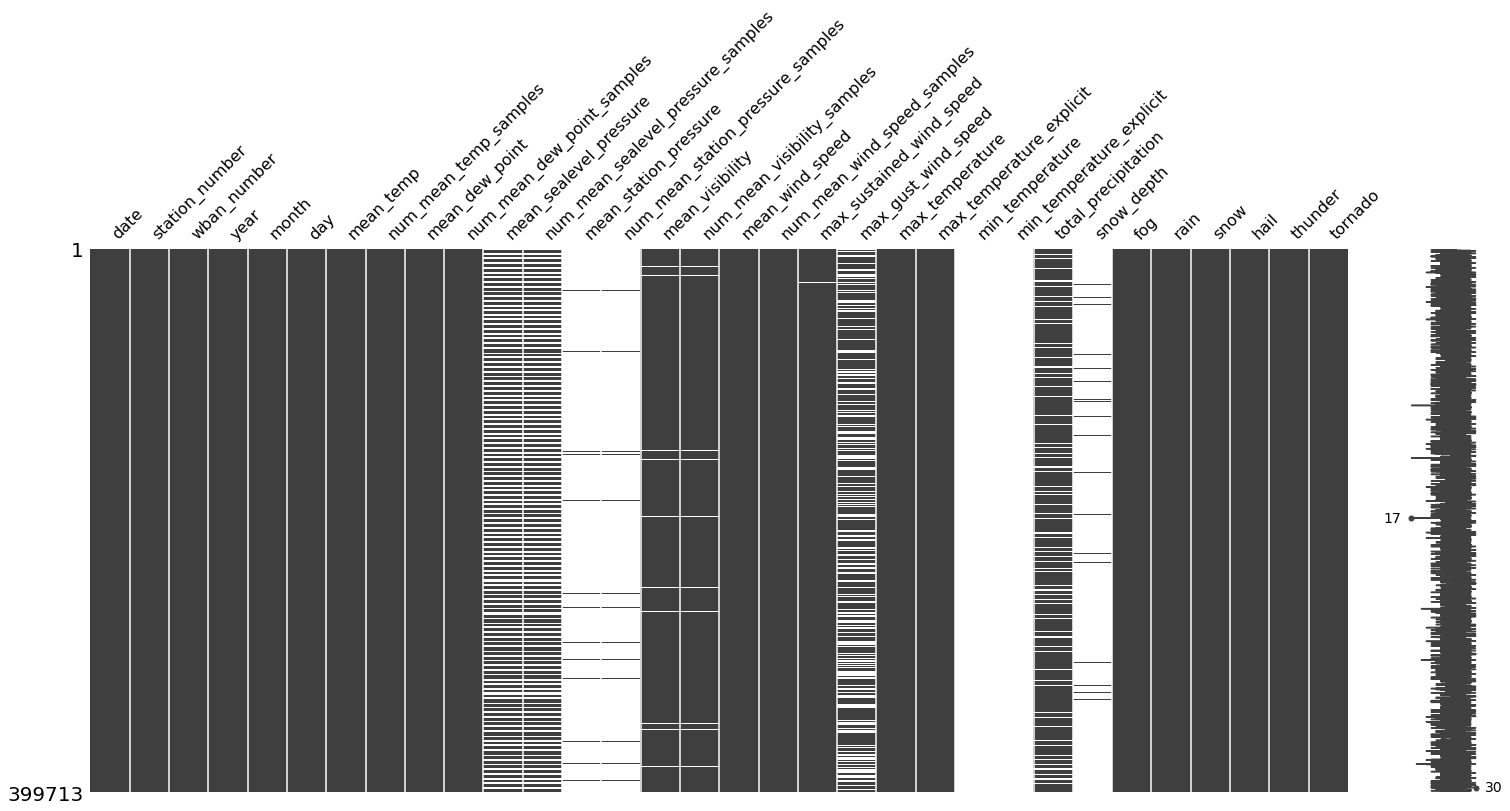

In [73]:

msno.matrix(df_parttwo)

### Data Exploration Continued:

Observations

1. `date` columns has been successfully added and `year`,`month` and `day`, columns still exist.
2. column `snow` has categorical variables with a significant amount of False w.r.t True[there is a bit of bias in the data]
3. listing the columns to decide which one to truncate.

In [74]:
df_parttwo.head()

,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2005-07-10,725869,99999,2005,7,10,68.400002,5,50.700001,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,2005-02-11,725835,99999,2005,2,11,22.600000,5,16.500000,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False
2,2005-12-24,725868,99999,2005,12,24,28.799999,5,27.700001,5.0,...,NaN,None,0.0,1.2,False,False,False,False,False,False
3,2005-06-30,725467,99999,2005,6,30,83.800003,5,71.599998,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,2005-03-24,725488,99999,2005,3,24,35.900002,6,26.200001,5.0,...,NaN,None,0.0,NaN,False,False,False,False,False,False


In [75]:
df_parttwo['snow']

0         False
1         False
2         False
3         False
4         False
          ...  
399708    False
399709    False
399710    False
399711    False
399712    False
Name: snow, Length: 399713, dtype: bool

In [76]:
df_parttwo['snow'].value_counts()

False    357481
True      42232
Name: snow, dtype: int64

In [77]:
df_parttwo.columns

Index(['date', 'station_number', 'wban_number', 'year', 'month', 'day',
       'mean_temp', 'num_mean_temp_samples', 'mean_dew_point',
       'num_mean_dew_point_samples', 'mean_sealevel_pressure',
       'num_mean_sealevel_pressure_samples', 'mean_station_pressure',
       'num_mean_station_pressure_samples', 'mean_visibility',
       'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

### Further plots to analyse the data:

1. date in the axis=x is very dense in the plot
2. plotting snow against date to see the distribution of data
3. Computing pairwise correlation of columns[using pearson's method]

In [78]:
sns.set_style('whitegrid')

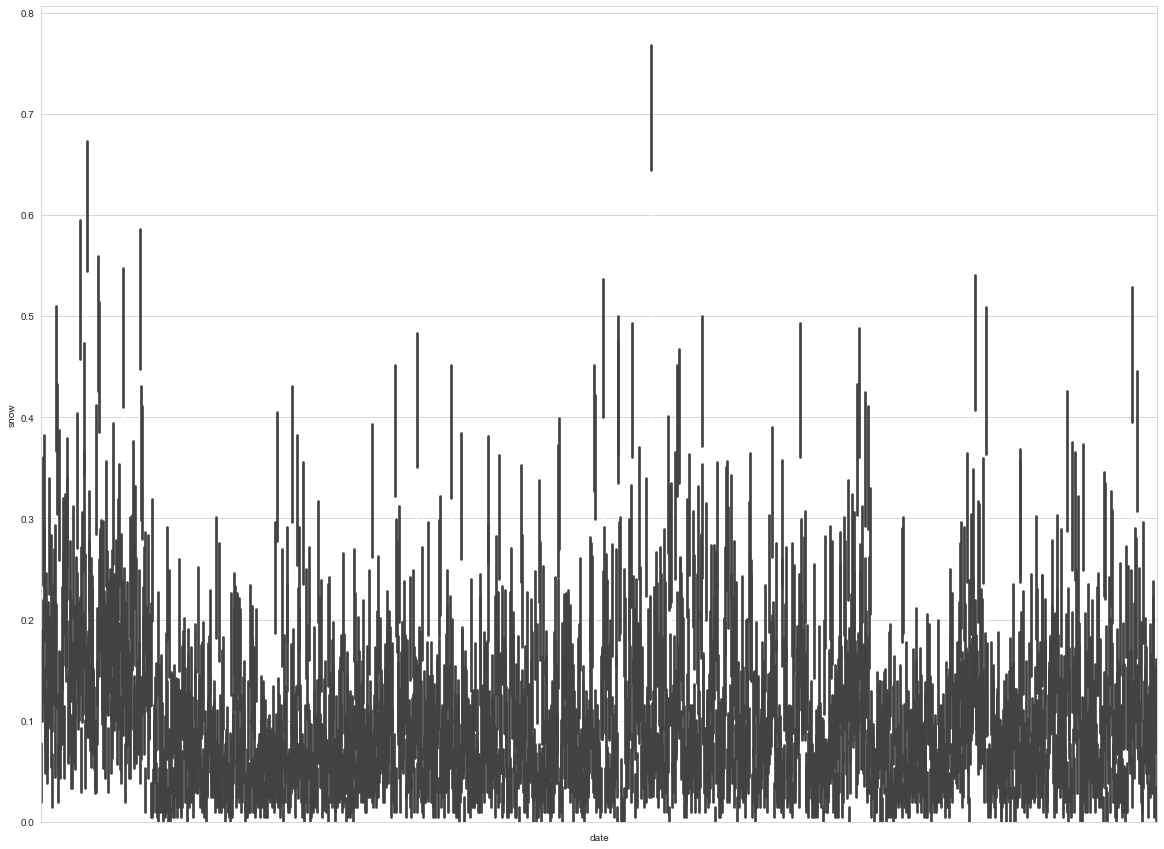

In [79]:
# date in the axis=x is very dense in the plot

plt.subplots(figsize=(20,15))
plot_ = sns.barplot(x='date', y="snow", data=df_parttwo)
plot_.xaxis.set_major_locator(ticker.LinearLocator(100))


In [80]:
#Computing pairwise correlation of columns[using pearson's method]
df_parttwo.corr(method='pearson')

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,max_temperature,min_temperature,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
station_number,1.000000,-0.005510,-0.001299,-0.000297,-0.000543,-0.081490,-0.043001,-0.133589,-0.043309,-0.032799,...,-0.111804,NaN,0.066569,0.344115,0.095777,0.095777,0.095777,0.095777,0.095777,0.095777
wban_number,-0.005510,1.000000,-0.291515,0.018532,0.000578,0.028949,-0.106774,0.073737,-0.106276,0.001668,...,0.045494,NaN,-0.018632,0.176407,-0.071926,-0.071926,-0.071926,-0.071926,-0.071926,-0.071926
year,-0.001299,-0.291515,1.000000,-0.121259,-0.013434,-0.118582,0.046044,-0.106738,0.046167,0.013531,...,-0.103347,NaN,0.007060,0.006162,-0.057822,-0.057822,-0.057822,-0.057822,-0.057822,-0.057822
month,-0.000297,0.018532,-0.121259,1.000000,0.015320,0.247371,0.005837,0.254591,0.006397,0.016806,...,0.248772,NaN,0.020200,-0.158569,-0.019791,-0.019791,-0.019791,-0.019791,-0.019791,-0.019791
day,-0.000543,0.000578,-0.013434,0.015320,1.000000,0.018283,0.002778,0.018666,0.002336,0.002922,...,0.017894,NaN,0.007453,-0.002988,-0.000808,-0.000808,-0.000808,-0.000808,-0.000808,-0.000808
mean_temp,-0.081490,0.028949,-0.118582,0.247371,0.018283,1.000000,-0.013793,0.909675,-0.012754,-0.346939,...,0.963911,NaN,0.047247,-0.209743,-0.103623,-0.103623,-0.103623,-0.103623,-0.103623,-0.103623
num_mean_temp_samples,-0.043001,-0.106774,0.046044,0.005837,0.002778,-0.013793,1.000000,-0.007336,0.994558,-0.031480,...,-0.027416,NaN,0.019400,-0.273108,0.043120,0.043120,0.043120,0.043120,0.043120,0.043120
mean_dew_point,-0.133589,0.073737,-0.106738,0.254591,0.018666,0.909675,-0.007336,1.000000,-0.006808,-0.335208,...,0.939258,NaN,0.147684,-0.149478,-0.003241,-0.003241,-0.003241,-0.003241,-0.003241,-0.003241
num_mean_dew_point_samples,-0.043309,-0.106276,0.046167,0.006397,0.002336,-0.012754,0.994558,-0.006808,1.000000,-0.028915,...,-0.026603,NaN,0.015582,-0.274985,0.041596,0.041596,0.041596,0.041596,0.041596,0.041596
mean_sealevel_pressure,-0.032799,0.001668,0.013531,0.016806,0.002922,-0.346939,-0.031480,-0.335208,-0.028915,1.000000,...,-0.371011,NaN,-0.203940,0.017079,-0.043533,-0.043533,-0.043533,-0.043533,-0.043533,-0.043533


In [81]:
# copy dfs as instances
df_selection = df_parttwo.copy()

### Feature Selection (Part one: Pearson's correlation)

Heatmap exhibits correlations based on Pearson's method -- 


1. 1.0 represents highest correlation and -0.4 the least. Again, <font color=red>color=Red</font> has the highest correlation and deeper the <font color=blue>color=Blue</font> exhibits the least.
2. After checking the columns `fog`,`rain`,`thunder`,`tornado` are highly correlated with snow
    * Not likely to be trusted as the tables represent/replicate almost the same values: not very good for our training set

<AxesSubplot:>

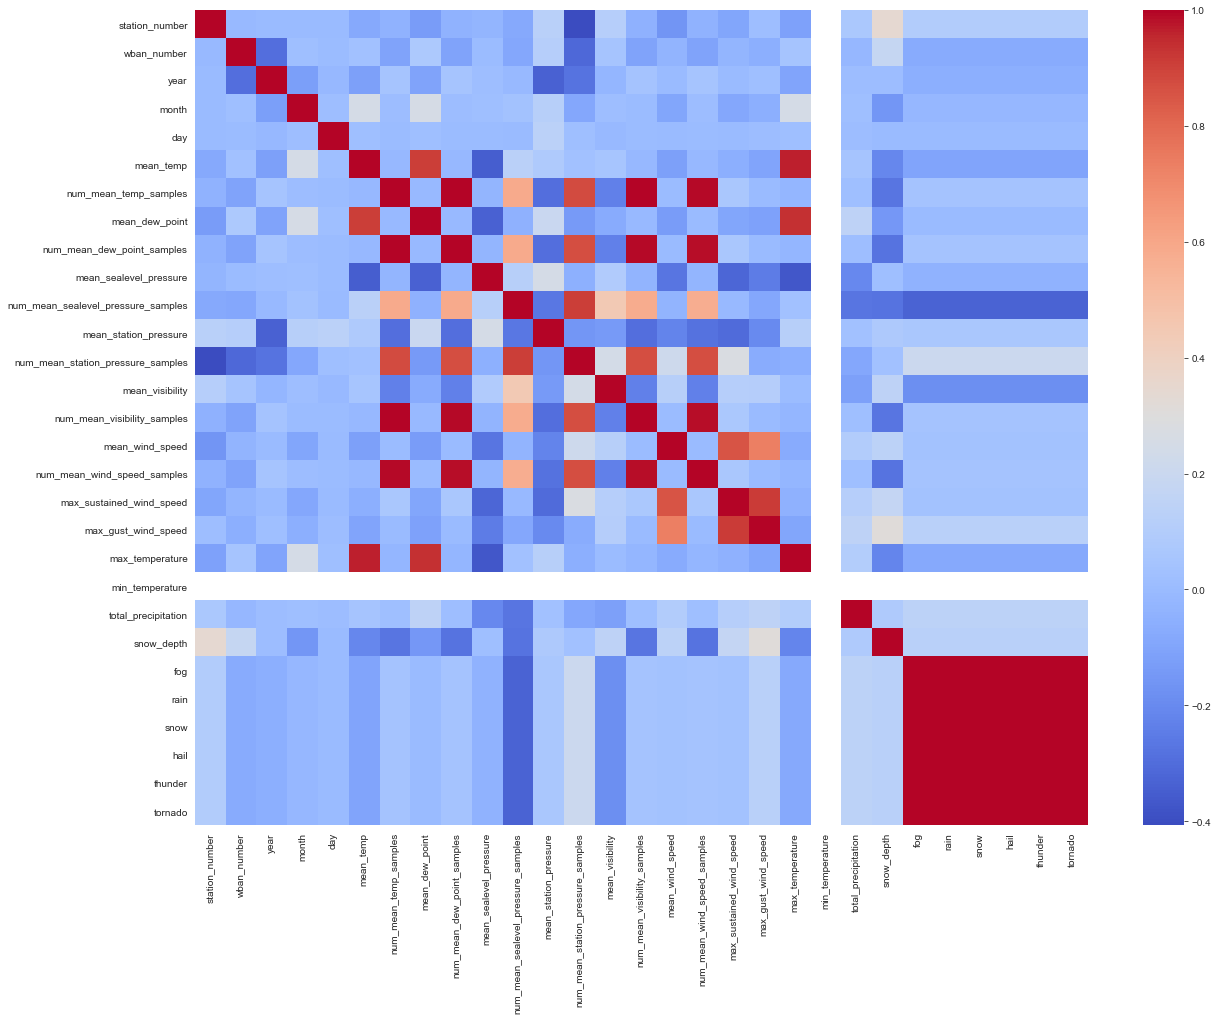

In [82]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_parttwo.corr(method='pearson'),cmap='coolwarm')

### Modelling
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

#### Feature selection: (Part two: feature selector scikit learn)

In [83]:
# eliminate days with less than 190 out 212 stations
dates_with_enough_data = (df_selection.groupby("date")["station_number"].count() > 190).index
eliminate_days = df_selection.date.isin(dates_with_enough_data)

# # eliminate stations with less than 1730 days of data out of 1930
stations_with_enough_data = (df_selection.groupby("station_number")["date"].count() > 1730).index
eliminate_stations = df_selection.station_number.isin(stations_with_enough_data)

In [84]:
eliminate_cols = (
    (df_selection.isna().mean(axis=0) < 0.15) # these columns have more than 15% missing values
    & ~df_selection.columns.isin(["snow", "fog", "hail", "rain", "thunder", "tornado"]) # eliminate columns to predict
#     & df_selection.columns.isin(["year", "month", "day",])
)

eliminate_rows =  (
    eliminate_days
    & eliminate_stations)

In [85]:
X = df_selection.loc[eliminate_rows, eliminate_cols].set_index(["date",  "wban_number", ])
y = df_selection.loc[eliminate_rows, "snow"]

In [86]:
# imputation
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

In [87]:
#from scikit learn: feature selector
feature_selector = feature_selection.SelectKBest(k=5)

X_reduced = feature_selector.fit_transform(X, y)

In [88]:
# suggested features.col
X.columns[feature_selector.get_support()]

Index(['station_number', 'mean_temp', 'mean_visibility', 'max_temperature',
       'total_precipitation'],
      dtype='object')

<AxesSubplot:>

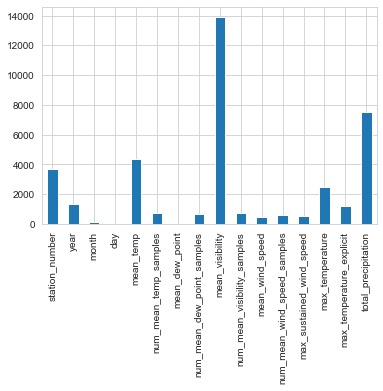

In [89]:
pd.Series(feature_selector.scores_, index=X.columns ).plot.bar()

#### Test, Train split 


In [90]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_reduced, y, test_size=0.33, random_state=42)

In [91]:
X_train.shape

(267807, 5)

### Model One: Logistic Regression

In [92]:
model = linear_model.LogisticRegression()

In [93]:

model.fit(X_train,y_train)

LogisticRegression()

In [94]:
predictions = model.predict(X_test)

In [95]:
metrics.confusion_matrix(y_test, predictions)

array([[118061,      0],
       [ 13845,      0]])

In [96]:
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("recall", metrics.recall_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))

accuracy 0.8950388913317059
recall 0.0
precision 0.0


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.90      1.00      0.94    118061
        True       0.00      0.00      0.00     13845

    accuracy                           0.90    131906
   macro avg       0.45      0.50      0.47    131906
weighted avg       0.80      0.90      0.85    131906



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Two: Decision Tree

In [98]:
model1 = tree.DecisionTreeClassifier()

In [99]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
predictions1=model1.predict(X_test)

In [101]:
print(metrics.classification_report(y_test, predictions1))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94    118061
        True       0.46      0.48      0.47     13845

    accuracy                           0.89    131906
   macro avg       0.70      0.71      0.70    131906
weighted avg       0.89      0.89      0.89    131906



### Model Three: Random Forest

In [102]:
model2 = ensemble.RandomForestClassifier()

In [103]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
predictions2 = model2.predict(X_test)

In [105]:
print(metrics.classification_report(y_test, predictions2))

              precision    recall  f1-score   support

       False       0.94      0.97      0.95    118061
        True       0.66      0.43      0.52     13845

    accuracy                           0.92    131906
   macro avg       0.80      0.70      0.74    131906
weighted avg       0.91      0.92      0.91    131906



### 3. Task
Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.

In [ ]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]


In [ ]:
from datetime import datetime as dt
DATEFMT='%Y-%m-%d'


In [ ]:
ts=dt.strptime('2010-05-07',DATEFMT)
ts

In [ ]:
ts.year,ts.month,ts.day

## Part 2
If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:

In [ ]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]

You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1. 

In [ ]:
#               Station A     Station B     Station C
# 2010-01-01
# 2010-01-02
# 2010-01-03